In [370]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from sklearn.cluster import KMeans
import math

In [371]:
number_of_clasters = 3
color1=['yellow','red','green']

[(1.3223550590057487, 5.370617454550907), (1.9139478141645037, 4.504767480308019), (2.68077120461976, 3.3702360661344084), (1.186662157711012, 3.3782175933428387), (1.6162020288434926, 3.594636038407236), (3.248454061455907, 3.4973239842795105), (1.9896277407638308, 3.650041318598826), (2.3261254374625153, 3.9264287814176404), (2.8745767254155865, 3.874152930175866), (1.6151893287133783, 3.5625129616192615)]


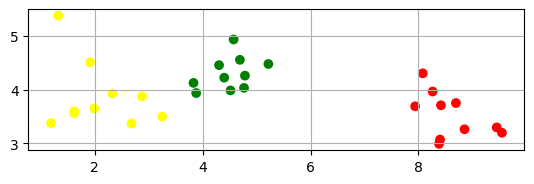

In [383]:

data = []
data_w_color=[]
clusters = []
cluster = []
for i in range(number_of_clasters):
    center = (random.uniform(0, 8), random.uniform(0, 8))
    for j in range(10):
            x = center[0] + abs(random.gauss(0, 1))
            y = center[1] + abs(random.gauss(0, 1))
            cluster.append((x,y))
            data.append((x, y))
            data_w_color.append((x,y,color1[i]))
    clusters.append(cluster.copy())
    del cluster[:]
print(clusters[0])
figure, axes = plt.subplots()
axes.set_aspect(1)
x,y, color = zip(*data_w_color)
plt.scatter(x,y,color = color)
plt.grid()
plt.show()


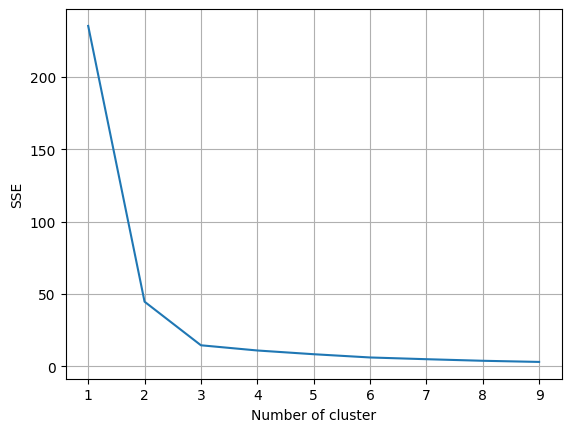

In [384]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 10).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.grid()
plt.show()

<H1>Демонстрация центров и окружностей кластеров</H1>

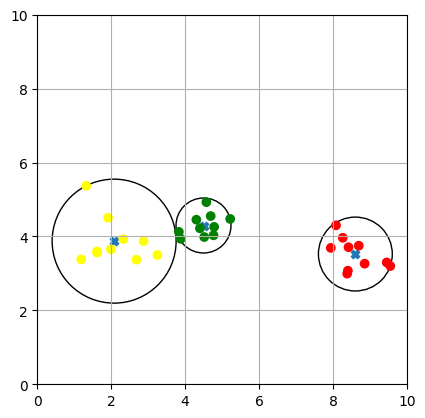

In [385]:
centers = []
c_radius = []
for cluster in clusters:
    center_x = sum(point[0] for point in cluster) / len(cluster)
    center_y = sum(point[1] for point in cluster) / len(cluster)
    c_radius.append(max(*list(math.sqrt((point[0]-center_x)**2+(point[1]-center_y)**2) for point in cluster)))
    centers.append((center_x, center_y))
x_center, y_center = zip(*centers)
figure, axes = plt.subplots()
plt.axis([0, 10, 0, 10])
axes.set_aspect(1)
for i in range(len(c_radius)):
    circle = plt.Circle((x_center[i],y_center[i]), c_radius[i] ,fill = False )
    axes.add_artist(circle)
plt.grid()
plt.scatter(x_center, y_center, marker='X')
plt.scatter(x, y ,color = color)

<H1>Добавление новых точек</H1>

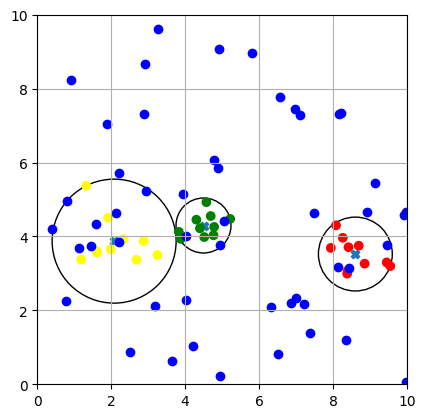

In [386]:
new_points = [(random.uniform(0,10),random.uniform(0,10)) for i in range(50)]

figure, axes = plt.subplots()
plt.axis([0, 10, 0, 10])
axes.set_aspect(1)
for i in range(len(c_radius)):
    circle = plt.Circle((x_center[i],y_center[i]), c_radius[i] ,fill = False )
    axes.add_artist(circle)
plt.scatter(x_center, y_center, marker='X')
plt.scatter(x, y ,color = color)
x_new,y_new = zip(*new_points)
plt.grid()
plt.scatter(x_new,y_new, c = 'blue')



<H1>Перерасчет кластеров с новыми точками</H1>

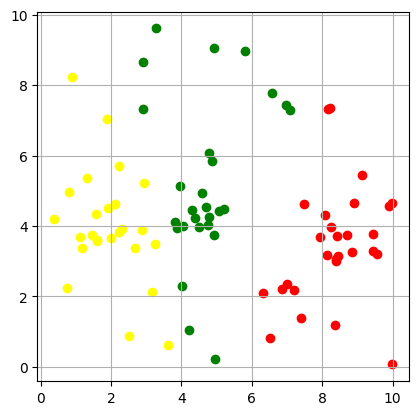

In [387]:
for point in new_points:
    min_distance = float('inf')
    for i in range(len(centers)):
        distance = math.sqrt((centers[i][0]-point[0])**2+(centers[i][1]-point[1])**2)
        if distance < min_distance:
            min_distance = distance
            cluster_number = i
    clusters[cluster_number].append(point)
figure, axes = plt.subplots()
axes.set_aspect(1)
for i in range(len(clusters)):
    new_x_clusters, new_y_clusters = zip(*clusters[i])
    plt.scatter(new_x_clusters, new_y_clusters ,color = color1[i])
plt.grid()


<H1>Поиск нового центра и радиуса окружности</H1>

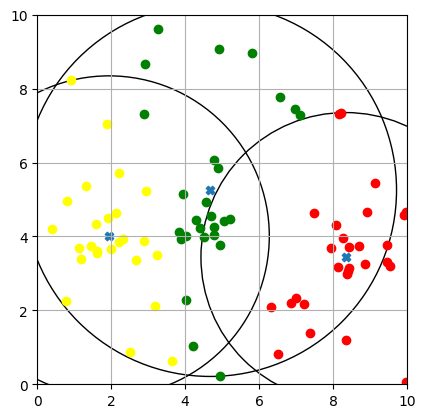

In [388]:
centers = []
c_radius2 = []
for cluster in clusters:
    center_x = sum(point[0] for point in cluster) / len(cluster)
    center_y = sum(point[1] for point in cluster) / len(cluster)
    c_radius2.append(max(*list(math.sqrt((point[0]-center_x)**2+(point[1]-center_y)**2) for point in cluster)))
    centers.append((center_x, center_y))
x_center, y_center = zip(*centers)
figure, axes = plt.subplots()
axes.set_aspect(1)
plt.axis([0, 10, 0, 10])
for i in range(len(c_radius2)):
    circle = plt.Circle((x_center[i],y_center[i]), c_radius2[i] ,fill = False )
    axes.add_artist(circle)
plt.grid()
plt.scatter(x_center, y_center, marker='X')
for i in range(len(clusters)):
    new_x_clusters, new_y_clusters = zip(*clusters[i])
    plt.scatter(new_x_clusters, new_y_clusters ,color = color1[i])

<H1>Итоговый цикл</H1>

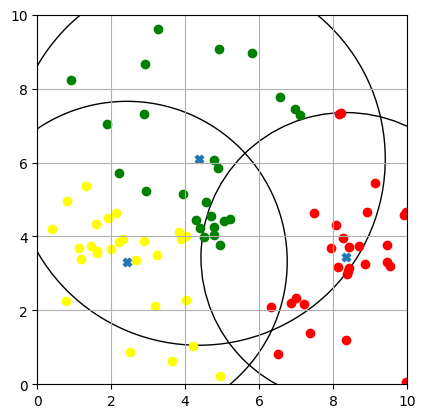

In [389]:
z=0

while z < 10000:
    for cluster in clusters:
        for k in range(len(cluster)):
            min_distance = float('inf')
            try:
                if cluster[k]: pass
            except:
                break
            for i in range(len(centers)):
                distance = math.sqrt((centers[i][0]-cluster[k][0])**2+(centers[i][1]-cluster[k][1])**2)
                if distance < min_distance:
                    min_distance = distance
                    cluster_number = i
            clusters[cluster_number].append(cluster.pop(k))
    del centers[:]
    for cluster in clusters:
        center_x = sum(point[0] for point in cluster) / len(cluster)
        center_y = sum(point[1] for point in cluster) / len(cluster)
        centers.append((center_x, center_y))
    z+=1
    
x_center, y_center = zip(*centers)
figure, axes = plt.subplots()
plt.axis([0, 10, 0, 10])
axes.set_aspect(1)
for i in range(len(c_radius2)):
    circle = plt.Circle((x_center[i],y_center[i]), c_radius2[i] ,fill = False )
    axes.add_artist(circle)
plt.grid()
plt.scatter(x_center, y_center, marker='X')
for i in range(len(clusters)):
    new_x_clusters, new_y_clusters = zip(*clusters[i])
    plt.scatter(new_x_clusters, new_y_clusters ,color = color1[i])